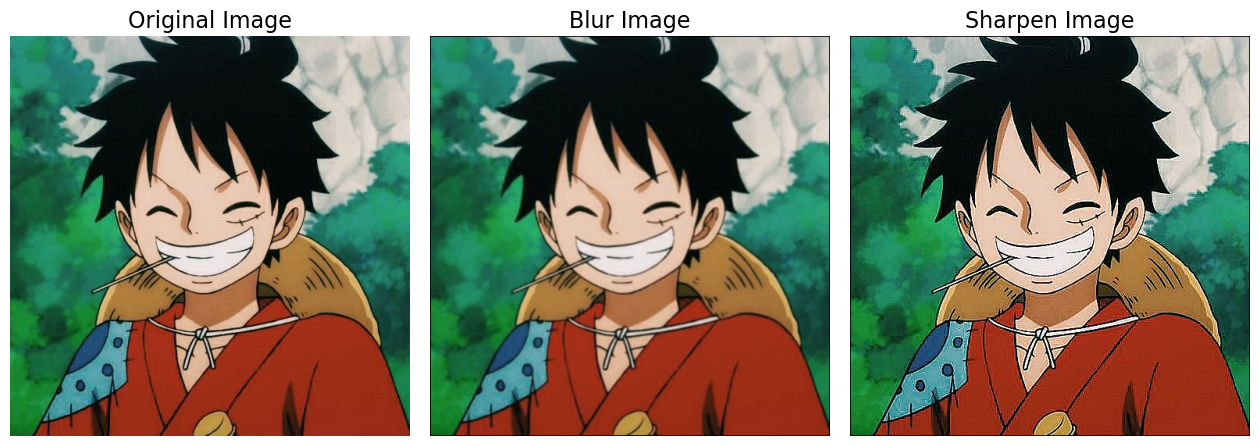

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. Thay đổi độ sáng cho ảnh
def Bright_Image(image, intensity):
    img=np.array(image)
    height, width, _ =img.shape
    
    bright_image=np.zeros((height, width, _)) + intensity
    bright_image += img
    bright_image =np.where(bright_image < 255, bright_image, 255)
    bright_image =np.where(bright_image > 0, bright_image, 0)
    
    result = bright_image.astype(np.uint8)
    result = Image.fromarray(result)  
    return result

# 2. Thay đổi độ tương phản
def Contrast_Image(image, gamma):
    img=np.array(image)
    
    contract_image = img*gamma
    
    contract_image=np.where(contract_image < 255, contract_image, 255)
    contract_image=np.where(contract_image > 0, contract_image, 0)
    
    result = contract_image.astype(np.uint8)
    result = Image.fromarray(result) 
    return result

#lật ngang ảnh
def Flip_Horizontal_Image(image):
    img=np.array(image)
    img=img[:, ::-1, :]
    
    result = img.astype(np.uint8)
    result = Image.fromarray(result) 
    return result

#lật dọc ảnh
def Flip_Vertical_Image(image):
    img=np.array(image)
    img=img[::-1,:,:]
    
    result = img.astype(np.uint8)
    result = Image.fromarray(result) 
    return result

#Đổi ảnh RGB thành ảnh xám
def Gray_Image(image):
    img=np.array(image)
    R=img[:,:,0]
    G=img[:,:,1]
    B=img[:,:,2]
    gray=(R*0.3+G*0.59+B*0.11)
    gray=np.where(gray < 255, gray, 255)
    gray=np.where(gray > 0, gray, 0) 
    
    result = gray.astype(np.uint8)
    rgb_image= np.dstack((result, result, result))
    result = Image.fromarray(rgb_image) 
    
    return result

#Đổi ảnh RGB thành ảnh sepia
def Sepia_Image(image):
    img=np.array(image)
    R=img[:,:,0]
    G=img[:,:,1]
    B=img[:,:,2]
    img=np.dstack((R*0.393 + G*0.769 + B*0.189, 
        R*0.349 + G*0.686 + B*0.168, 
        R*0.272 + G*0.534 + B*0.131))
    img=np.where(img < 255, img, 255)
    img=np.where(img > 0, img, 0) 
    result = img.astype(np.uint8)
    result = Image.fromarray(result) 
    return result

#Làm mờ ảnh
def Blur_Image(image):
    img=np.array(image)
    height,width, _ =img.shape
    
    kernel = np.array([[1.0, 2.0, 1.0], [2.0, 4.0, 2.0], [1.0, 2.0, 1.0]])
    kernel = kernel/16
    
    blur_image = np.zeros((height, width, _), float)
    for h in range(1, height - 1):
        for w in range(1, width - 1):
            for k in range(3):
                blur_image[h, w, k] = float(np.sum(img[h-1:h+2,w-1:w+2, k]*kernel))
    blur_image=np.where(blur_image < 255, blur_image, 255)
    blur_image=np.where(blur_image > 0, blur_image, 0)
    
    result = blur_image.astype(np.uint8)
    result = Image.fromarray(result) 
    return result 

#Làm sắc nét ảnh
def Sharpen_Image(image):
    img=np.array(image)
    height,width, _ =img.shape
    
    kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    
    sharpen_image = np.zeros((height, width, _), float)
    for h in range(1, height - 1):
        for w in range(1, width - 1):
            for k in range(3):
                sharpen_image[h, w, k] = float(np.sum(img[h-1:h+2,w-1:w+2, k]*kernel))
    sharpen_image=np.where(sharpen_image < 255, sharpen_image, 255)
    sharpen_image=np.where(sharpen_image > 0, sharpen_image, 0)
    
    result = sharpen_image.astype(np.uint8)
    result = Image.fromarray(result) 
    return result 

#Cắt ảnh
def Crop(image):
    img=np.array(image)
    row, col, _ = img.shape
    row = row//2 - 95
    col = col//2 - 95
    
    img=img[row:row + 225, col:col +225, :]
    
    result = img.astype(np.uint8)
    #result= result.reshape(img.shape)
    result = Image.fromarray(result) 
    return result

#Cắt ảnh theo khung hình tròn 
def Crop_Circle_Image(image):
    img=np.array(image)
    row = img.shape[0]
    col = img.shape[1]
    
    y, x = np.ogrid[:col, :row]
    center_x = col//2
    center_y = row//2
    
    mask=(x-center_x)**2 + (y-center_y)**2 <= (row//2)**2
    crop=img*mask[:,:,np.newaxis]
    result=crop.astype(np.uint8)
    result = Image.fromarray(result)
    return result

#Cắt ảnh theo khung hình ellip   
def Crop_Flip_Image(image):
    img=np.array(image)
    height = img.shape[0]
    width = img.shape[1]
    y, x = np.ogrid[:height, :width]
    
    rotation_angle=45
    ellipse1_center=(width/2, height/2)
    ellipse2_center=(width/2, height/2)
    ellipse1_radius_x=width//3.25
    ellipse1_radius_y=height//3.25
    ellipse2_radius_x=width//3.25
    ellipse2_radius_y=height//3.25
    
    x_rot = (x - width / 2) * np.cos(np.radians(rotation_angle)) - (y - height / 2) * np.sin(np.radians(rotation_angle)) + width / 2
    y_rot = (x - width / 2) * np.sin(np.radians(rotation_angle)) + (y - height / 2) * np.cos(np.radians(rotation_angle)) + height / 2
    ellipse1 = (3/4) * ((x_rot - ellipse1_center[0]) / ellipse1_radius_x) ** 2 + (1/4) * ((y_rot - ellipse1_center[1]) / ellipse1_radius_y) ** 2 <= 1
    ellipse2 = (1/4) * ((x_rot - ellipse2_center[0]) / ellipse2_radius_x) ** 2 + (3/4) * ((y_rot - ellipse2_center[1]) / ellipse2_radius_y) ** 2 <= 1
    ellipse = np.logical_or(ellipse1, ellipse2)
    
    mask=ellipse
    crop=img*mask[:,:,np.newaxis]
    result=crop.astype(np.uint8)
    result = Image.fromarray(result)
    return result

def Show_Image(image, result, name):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(image)
    ax[0].axis('off')
    ax[0].set_title(f"Original Image", size=16)
    
    ax[1].imshow(result)  
    ax[1].set_title (str(name), size=16)
    ax[1].axis('off')
def Show(image, rs1, rs2, name1, name2):
    fig, ax = plt.subplots(1, 3,  figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(image)
    ax[0].axis('off')
    ax[0].set_title(f"Original Image", size=16)
        
    ax[1].imshow(rs1)  
    ax[1].set_title (str(name1), size=16)
    ax[1].axis('off')
        

    ax[2].imshow(rs2)  
    ax[2].set_title (str(name2), size=16)
    ax[2].axis('off')
def main():
    file=input("Nhập tên tập tin ảnh: ")
    image=Image.open(file)
    choice=int(input("Nhập lựa chọn của bạn(Nhập từ 0-8 để lựa chọn chức năng) \
                  0. Thực hiện tất cả các chức năng \
                  1. Thay đổi độ sáng cho ảnh \
                  2. Thay đổi độ tương phản \
                  3. Lật ảnh ngang - dọc \
                  4. Chuyển đổi ảnh RGB thành ảnh xám/sepia \
                  5. Làm mờ/sắc nét ảnh \
                  6. Cắt ảnh theo kích thước(cắt ở trung tâm) \
                  7. Cắt ảnh theo khung hình tròn \
                  8. Cắt ảnh theo khung là 2 hình ellip chéo nhau "))
    if choice==1 or choice==0:
        bright_image=Bright_Image(image, 100)
        bright_image.save(file.split('.')[0]+"_"+"bright.png","png", resolution=100.0)
        Show_Image(image, bright_image, 'Bright Image')
    if choice==2 or choice==0:
        contract_image=Contrast_Image(image, 1.5)
        contract_image.save(file.split('.')[0]+"_"+"contract.png","png", resolution=100.0)
        Show_Image(image, contract_image, 'Contract Image')
    if choice ==3 or choice == 0:
        horizontal_image=Flip_Horizontal_Image(image)
        horizontal_image.save(file.split('.')[0]+"_"+"flip_horizontal.png","png", resolution=100.0)
        
        vertical_image=Flip_Vertical_Image(image)
        vertical_image.save(file.split('.')[0]+"_"+"flip_vertical.png","png", resolution=100.0)

        Show(image, horizontal_image, vertical_image, 'Horizontal Image', 'Vertical Image')
    if choice == 4 or choice == 0:
        gray_image=Gray_Image(image)
        gray_image.save(file.split('.')[0]+"_"+"gray.png","png", resolution=100.0)
        
        sepia_image=Sepia_Image(image)
        sepia_image.save(file.split('.')[0]+"_"+"sepia.png","png", resolution=100.0)

        Show(image, gray_image, sepia_image, 'Gray Image', 'Sepia Image')
    if choice ==5 or choice == 0:    
        blur_image=Blur_Image(image)
        blur_image.save(file.split('.')[0]+"_"+"blur.png","png", resolution=100.0)
        
        sharpen_image=Sharpen_Image(image)
        sharpen_image.save(file.split('.')[0]+"_"+"sharpen.png","png", resolution=100.0)
        
        Show(image, blur_image, sharpen_image, 'Blur Image', 'Sharpen Image')
    if choice ==6 or choice == 0:    
        crop_image=Crop(image)
        crop_image.save(file.split('.')[0]+"_"+"crop.png","png", resolution=100.0)
        Show_Image(image, crop_image, 'Crop Image')
    if choice ==7 or choice == 0:
        crop_circle_image=Crop_Circle_Image(image)
        crop_circle_image.save(file.split('.')[0]+"_"+"crop_circle.png","png", resolution=100.0)
        Show_Image(image, crop_circle_image, 'Crop Circle Image')
    if choice == 8 or choice ==0:
        crop_circle_image=Crop_Flip_Image(image)
        crop_circle_image.save(file.split('.')[0]+"_"+"crop_ellipse.png","png", resolution=100.0)
        Show_Image(image, crop_circle_image, 'Crop Ellipse Image')
if __name__ == "__main__":   
    main()